## Telco Customer Churn Prediction Report
---

Author: Thattaphol Puttawithee


Tools: Python (Pandas, Scikit-learn, XGBoost), Power BI, SQL Server


Dataset: Telco Customer Churn (Kaggle)


Date: October 2025

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import data to Jupyter Notebook
Query data from SQL Server

In [87]:
import pandas as pd
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)

engine = create_engine(
    r"mssql+pyodbc://LAPTOP-QC1AHOCH\SQLEXPRESS/telco_db"
    r"?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

df = pd.read_sql("SELECT * FROM stg_Churn;", engine)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.599998,593.299988,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.900002,542.400024,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.900002,280.850006,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.000000,1237.849976,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.900002,267.399994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.150002,742.900024,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.099998,1873.699951,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.299999,92.750000,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.849998,4627.649902,No


In [88]:
df["ChargeRatio"] = df["TotalCharges"] / (df["tenure"] + 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeRatio
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.599998,593.299988,No,59.329999
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.900002,542.400024,No,54.240002
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.900002,280.850006,Yes,56.170001
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.000000,1237.849976,Yes,88.417855
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.900002,267.399994,Yes,66.849998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.150002,742.900024,No,53.064287
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.099998,1873.699951,Yes,81.465215
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.299999,92.750000,No,30.916667
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.849998,4627.649902,No,68.053675


In [89]:
df["PaymentMethod"].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [90]:
df["PaymentAutomatic"] = df["PaymentMethod"].apply(lambda x: 1 if "automatic" in x.lower() else 0)

In [91]:
for m in [12, 24, 36, 48, 60]:
    df[f"tenure_ge_{m}m"] = (df["tenure"] >= m).astype(int)

In [92]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,tenure,MonthlyCharges,TotalCharges,ChargeRatio,PaymentAutomatic,tenure_ge_12m,tenure_ge_24m,tenure_ge_36m,tenure_ge_48m,tenure_ge_60m
count,7043.000000,7043.000000,7032.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,59.083067,0.435326,0.706233,0.557575,0.433196,0.326991,0.210564
std,24.559481,30.090047,2266.771363,30.514438,0.495835,0.455519,0.496709,0.495552,0.469147,0.407738
min,0.000000,18.250000,18.799999,9.183333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,401.449997,26.225944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.349998,1397.475037,61.070387,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,89.849998,3794.737488,84.877538,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,118.750000,8684.799805,118.969860,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check NULL
Check null value in the data

In [93]:
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
ChargeRatio         11
PaymentAutomatic     0
tenure_ge_12m        0
tenure_ge_24m        0
tenure_ge_36m        0
tenure_ge_48m        0
tenure_ge_60m        0
dtype: int64

Remove null

In [94]:
df = df.dropna()


## Check Outliers

<Axes: xlabel='tenure'>

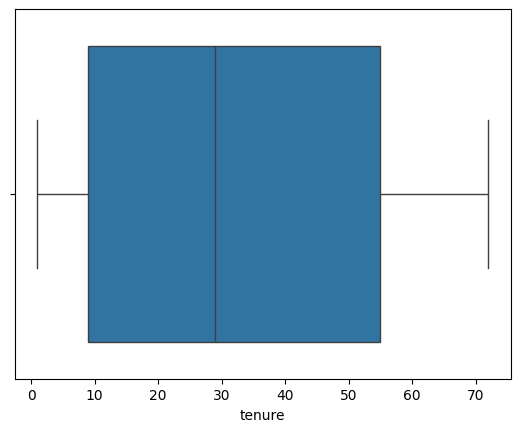

In [95]:
sns.boxplot(x=df['tenure'])

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

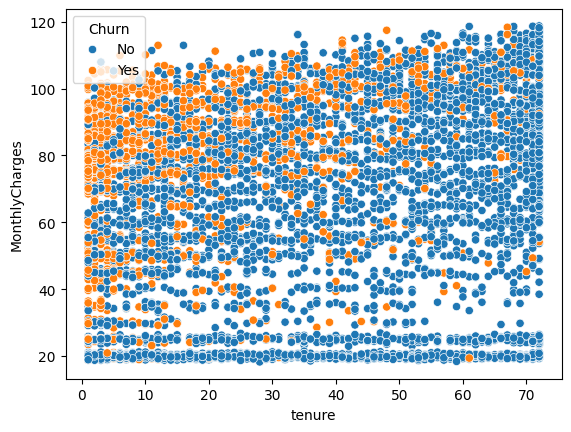

In [96]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)

## Check data balance

<Axes: xlabel='Churn'>

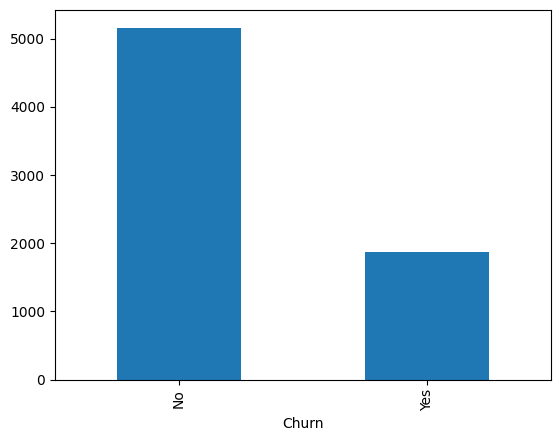

In [97]:
df['Churn'].value_counts().plot(kind='bar')

In [98]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeRatio,PaymentAutomatic,tenure_ge_12m,tenure_ge_24m,tenure_ge_36m,tenure_ge_48m,tenure_ge_60m
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.599998,593.299988,No,59.329999,0,0,0,0,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.900002,542.400024,No,54.240002,0,0,0,0,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.900002,280.850006,Yes,56.170001,0,0,0,0,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.000000,1237.849976,Yes,88.417855,0,1,0,0,0,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.900002,267.399994,Yes,66.849998,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.150002,742.900024,No,53.064287,0,1,0,0,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.099998,1873.699951,Yes,81.465215,0,1,0,0,0,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.299999,92.750000,No,30.916667,0,0,0,0,0,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.849998,4627.649902,No,68.053675,0,1,1,1,1,1


In [99]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn']

df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': -1})
df


C:\Temp\ipykernel_3172\2260154420.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})
C:\Temp\ipykernel_3172\2260154420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})
C:\Temp\ipykernel_3172\2260154420.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeRatio,PaymentAutomatic,tenure_ge_12m,tenure_ge_24m,tenure_ge_36m,tenure_ge_48m,tenure_ge_60m
0,0002-ORFBO,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.599998,593.299988,0,59.329999,0,0,0,0,0,0
1,0003-MKNFE,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.900002,542.400024,0,54.240002,0,0,0,0,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.900002,280.850006,1,56.170001,0,0,0,0,0,0
3,0011-IGKFF,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.000000,1237.849976,1,88.417855,0,1,0,0,0,0
4,0013-EXCHZ,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.900002,267.399994,1,66.849998,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.150002,742.900024,0,53.064287,0,1,0,0,0,0
7039,9992-RRAMN,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.099998,1873.699951,1,81.465215,0,1,0,0,0,0
7040,9992-UJOEL,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.299999,92.750000,0,30.916667,0,0,0,0,0,0
7041,9993-LHIEB,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.849998,4627.649902,0,68.053675,0,1,1,1,1,1


In [100]:
Services_cols = (['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
df[Services_cols] = df[Services_cols].replace({'No internet service': 0})
df.isin(['No internet service']).sum()

C:\Temp\ipykernel_3172\3187367540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[Services_cols] = df[Services_cols].replace({'No internet service': 0})
C:\Temp\ipykernel_3172\3187367540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Services_cols] = df[Services_cols].replace({'No internet service': 0})


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
ChargeRatio         0
PaymentAutomatic    0
tenure_ge_12m       0
tenure_ge_24m       0
tenure_ge_36m       0
tenure_ge_48m       0
tenure_ge_60m       0
dtype: int64

In [101]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

C:\Temp\ipykernel_3172\2584085859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)


In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargeRatio']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

C:\Temp\ipykernel_3172\3296849014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeRatio,PaymentAutomatic,tenure_ge_12m,tenure_ge_24m,tenure_ge_36m,tenure_ge_48m,tenure_ge_60m
0,0002-ORFBO,0,0,1,1,-0.954296,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,0.026652,-0.745607,0,0.008093,0,0,0,0,0,0
1,0003-MKNFE,1,0,0,0,-0.954296,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,-0.162819,-0.768063,0,-0.158725,0,0,0,0,0,0
2,0004-TLHLJ,1,0,0,0,-1.158016,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,0.302548,-0.883456,1,-0.095472,0,0,0,0,0,0
3,0011-IGKFF,1,1,1,0,-0.791321,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,1.103642,-0.461240,1,0.961410,0,1,0,0,0,0
4,0013-EXCHZ,0,1,1,0,-1.198760,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,0.634952,-0.889390,1,0.254551,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,-0.791321,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,-0.320711,-0.679605,0,-0.197258,0,1,0,0,0,0
7039,9992-RRAMN,1,0,1,0,-0.424625,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,0.674841,-0.180711,1,0.733546,0,1,0,0,0,0
7040,9992-UJOEL,1,0,0,0,-1.239504,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,-0.481927,-0.966443,0,-0.923117,0,0,0,0,0,0
7041,9993-LHIEB,1,0,1,1,1.408853,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,0.101443,1.034298,0,0.294000,0,1,1,1,1,1


In [103]:
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ChargeRatio,PaymentAutomatic,tenure_ge_12m,tenure_ge_24m,tenure_ge_36m,tenure_ge_48m,tenure_ge_60m,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,1,1,-0.954296,1,0,0,1,0,1,1,0,1,0.026652,-0.745607,0,0.008093,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0003-MKNFE,1,0,0,0,-0.954296,1,1,0,0,0,0,0,1,0,-0.162819,-0.768063,0,-0.158725,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,-1.158016,1,0,0,0,1,0,0,0,1,0.302548,-0.883456,1,-0.095472,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,0,-0.791321,1,0,0,1,1,0,1,1,1,1.103642,-0.461240,1,0.961410,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0013-EXCHZ,0,1,1,0,-1.198760,1,0,0,0,0,1,1,0,1,0.634952,-0.889390,1,0.254551,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,-0.791321,1,0,1,0,0,1,0,0,0,-0.320711,-0.679605,0,-0.197258,0,1,0,0,0,0,0,0,1,0,0,0,1
7039,9992-RRAMN,1,0,1,0,-0.424625,1,1,0,0,0,0,0,1,1,0.674841,-0.180711,1,0.733546,0,1,0,0,0,0,1,0,0,0,0,1,0
7040,9992-UJOEL,1,0,0,0,-1.239504,1,0,0,1,0,0,0,0,1,-0.481927,-0.966443,0,-0.923117,0,0,0,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,1,0,1,1,1.408853,1,0,1,0,1,1,0,1,0,0.101443,1.034298,0,0.294000,0,1,1,1,1,1,0,0,0,1,0,0,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   float64
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

## Train Test split

In [105]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn', 'customerID','TotalCharges','gender'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 28), (1407, 28), (5625,), (1407,))

Class imbalance

<Axes: xlabel='Churn'>

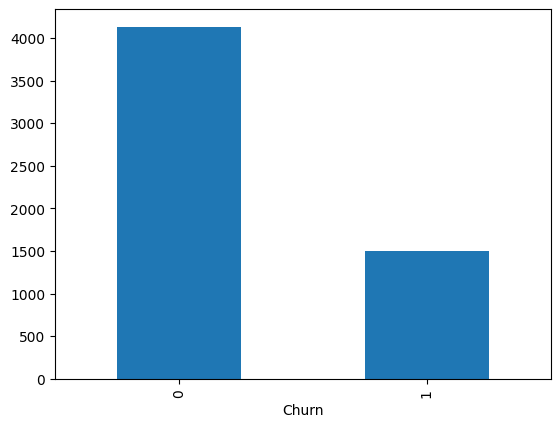

In [106]:
y_train.value_counts().plot(kind='bar')

Prepare SMOTE

In [107]:
import pandas as pd
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

y_train_series = pd.Series(y_train)
y_train_res_series = pd.Series(y_train_res)

print("Before SMOTE:", y_train_series.value_counts().to_dict())
print("After SMOTE :", y_train_res_series.value_counts().to_dict())


Before SMOTE: {0: 4130, 1: 1495}
After SMOTE : {0: 4130, 1: 4130}


## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_lr = LogisticRegression(class_weight='balanced', max_iter=1000) # balanced for imbalanced data
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407

ROC AUC: 0.8509261224510926


## RandomForest

In [109]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced_subsample', # balanced_subsample for imbalanced data
    max_depth=10,
    random_state=42
)
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, rf_pred))


ROC AUC: 0.8445405883905969
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.56      0.72      0.63       374

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.74      1407
weighted avg       0.80      0.78      0.78      1407



## XGB

In [110]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    learning_rate=0.05,
    n_estimators=500,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


ROC AUC: 0.8408806187264134

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



## Hyperparameter Tuning

Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=5000)

lr_param = {
    "C": loguniform(1e-3, 1e2),   # 0.001..100
    "penalty": ["l1", "l2"],
}

lr_rs = RandomizedSearchCV(
    lr, lr_param, n_iter=40, scoring="roc_auc", cv=cv,
    n_jobs=-1, random_state=42, error_score="raise"
)
lr_rs.fit(X_train, y_train)
print("Best parameters:", lr_rs.best_params_)

Best parameters: {'C': np.float64(0.5414413211338525), 'penalty': 'l2'}


In [112]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

best_lr = lr_rs.best_estimator_
y_proba = best_lr.predict_proba(X_test)[:, 1]

for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_pred_t = (y_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold = {t:.1f} | Precision = {precision:.3f} | Recall = {recall:.3f} | F1 = {f1:.3f}")


Threshold = 0.3 | Precision = 0.429 | Recall = 0.922 | F1 = 0.586
Threshold = 0.4 | Precision = 0.478 | Recall = 0.869 | F1 = 0.617
Threshold = 0.5 | Precision = 0.524 | Recall = 0.783 | F1 = 0.628
Threshold = 0.6 | Precision = 0.575 | Recall = 0.690 | F1 = 0.627
Threshold = 0.7 | Precision = 0.650 | Recall = 0.545 | F1 = 0.593


XMG

In [113]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform, loguniform
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For XGBoost class imbalance
scale = len(y_train[y_train==0]) / len(y_train[y_train==1] * 0.8)

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale,
    random_state=42
)

xgb_param = {
    "n_estimators": randint(300, 800),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 7),
    "min_child_weight": randint(1, 8),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5),
    "reg_lambda": loguniform(1e-2, 1e2),
    "reg_alpha": loguniform(1e-3, 1e1),
}

xgb_rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param,
    n_iter=50,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_rs.fit(X_train, y_train)

print("Best parameters:", xgb_rs.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'colsample_bytree': np.float64(0.8232408008069365), 'gamma': np.float64(0.2019180855290204), 'learning_rate': np.float64(0.02297844942179631), 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 567, 'reg_alpha': np.float64(0.010165510266418737), 'reg_lambda': np.float64(0.9749762207436125), 'subsample': np.float64(0.7203513239267079)}


In [114]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

best_xgb = xgb_rs.best_estimator_
y_proba = best_xgb.predict_proba(X_test)[:, 1]

for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_pred_t = (y_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    auc = roc_auc_score(y_test, y_proba)
    print(f"Threshold = {t:.1f} | Precision = {precision:.3f} | Recall = {recall:.3f} | F1 = {f1:.3f} | {auc:<10.3f}")


Threshold = 0.3 | Precision = 0.445 | Recall = 0.909 | F1 = 0.598 | 0.848     
Threshold = 0.4 | Precision = 0.499 | Recall = 0.866 | F1 = 0.633 | 0.848     
Threshold = 0.5 | Precision = 0.527 | Recall = 0.786 | F1 = 0.631 | 0.848     
Threshold = 0.6 | Precision = 0.573 | Recall = 0.693 | F1 = 0.627 | 0.848     
Threshold = 0.7 | Precision = 0.640 | Recall = 0.551 | F1 = 0.592 | 0.848     


CrossValidation (threshold = 0.4)

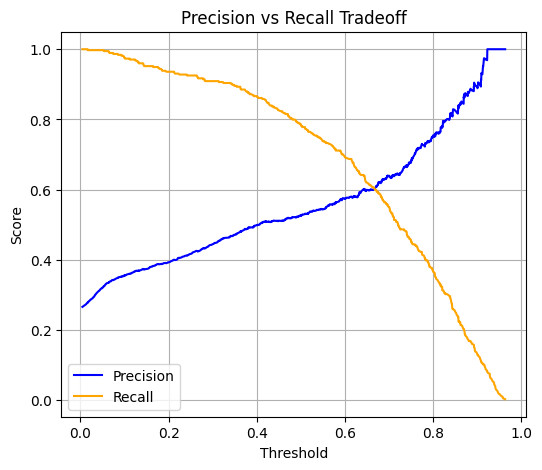

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s, aucs = [], [], [], []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit model
    model = best_xgb
    model.fit(X_tr, y_tr)
    
    # Predict probability
    y_proba = model.predict_proba(X_val)[:, 1]
    
    # Apply threshold = 0.4
    y_pred = (y_proba >= 0.4).astype(int)
    
    # Calculate metrics
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1s.append(f1_score(y_val, y_pred))
    aucs.append(roc_auc_score(y_val, y_proba))

print("Threshold-based Cross Validation (t=0.4)")
print(f"ROC-AUC   : {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")
print(f"Precision : {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recall    : {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")
print(f"F1        : {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")


Threshold-based Cross Validation (t=0.4)
ROC-AUC   : 0.842 ± 0.009
Precision : 0.487 ± 0.007
Recall    : 0.840 ± 0.022
F1        : 0.616 ± 0.008


In [117]:
# FINAL MODEL - XGBoost (threshold = 0.4)
import joblib
import numpy as np

final_xgb = xgb_rs.best_estimator_  # จาก RandomizedSearchCV
final_threshold = 0.4

# save model and threshold
joblib.dump(final_xgb, "final_xgb_model.joblib")
np.save("final_threshold.npy", np.array([final_threshold]))
print("Model and threshold saved.")


Model and threshold saved.


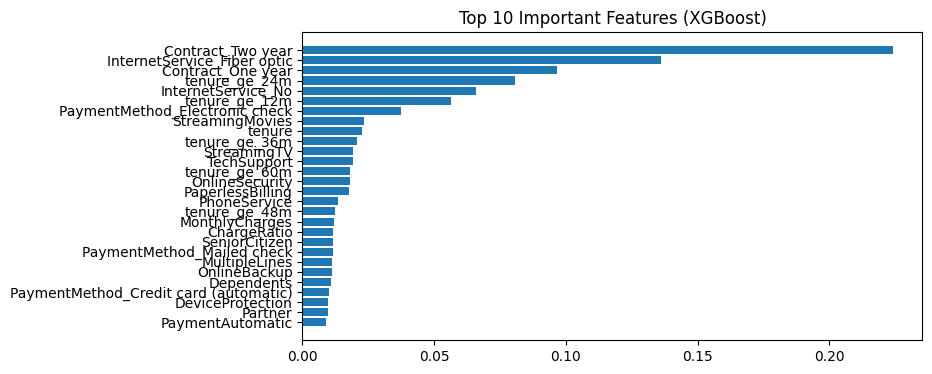

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": final_xgb.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,4))
plt.barh(importance["Feature"], importance["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features (XGBoost)")
plt.show()


## Executive Summary
---
“Developed a customer churn prediction model using XGBoost, achieving 0.84 ROC-AUC.
At threshold = 0.4, the model achieves 0.50 Precision, 0.86 Recall, and 0.63 F1-score.
Insights show that contract type, tenure, and monthly charges are the strongest predictors of churn.”

**Key Insights**
- Long-term contracts → drastically reduce churn

- Fiber optic customers → high churn risk

- Low tenure + high monthly charges → most likely to churn

**Recommended Business Actions**

- Offer loyalty discounts or incentives to short-tenure customers to reduce early churn.

- Improve satisfaction for fiber-optic customers through proactive service monitoring and feedback collection.

- Retarget paperless billing users with higher satisfaction campaigns